In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\pc\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('sonar_all.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
#dataset has 208 rows, 60 independent Variable and 1 Target Variable
df.shape

(208, 61)

In [4]:
#first we will do PCA with all the independent variables that is from 0-60
x = df.iloc[:,0:-1]
x.shape

(208, 60)

In [5]:
y = df.iloc[:,-1]
y.shape

(208,)

In [7]:
#doing the PCA and converting the data set of 10 independent variables
pca = PCA(n_components=10)
x = pca.fit_transform(x)

In [8]:
x = pd.DataFrame(x)
x.shape

(208, 10)

In [9]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277


In [11]:
#also encoding the target variables using Label Encoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)
y.shape

(208, 1)

In [12]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
dtypes: float64(10)
memory usage: 16.4 KB


In [14]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,-2.255141e-17,-4.056584e-17,1.266849e-17,1.127570e-17,1.708035e-17,-8.073136e-18,7.339215e-19,1.049174e-17,1.287699e-17,9.874580e-18
std,7.475641e-01,5.969033e-01,3.867231e-01,3.360182e-01,3.004478e-01,2.789444e-01,2.712011e-01,2.145191e-01,1.974355e-01,1.832843e-01
min,-1.402893e+00,-1.153807e+00,-9.366999e-01,-6.993244e-01,-7.247852e-01,-5.946661e-01,-7.558017e-01,-6.388454e-01,-5.863399e-01,-5.282906e-01
25%,-5.772305e-01,-4.528582e-01,-2.352344e-01,-2.266887e-01,-2.035958e-01,-1.799179e-01,-1.737484e-01,-1.338452e-01,-9.849582e-02,-9.947509e-02
50%,4.291975e-02,-5.543604e-02,-1.372230e-02,-2.093911e-02,8.825685e-03,-4.818261e-03,-1.684433e-02,5.946539e-03,1.465362e-02,3.834599e-03
75%,4.939137e-01,3.971998e-01,2.137333e-01,2.053990e-01,1.888693e-01,1.650326e-01,1.241432e-01,1.180029e-01,1.122550e-01,1.085331e-01
max,1.704801e+00,1.481776e+00,1.095637e+00,9.248534e-01,7.757588e-01,8.109163e-01,9.101572e-01,6.459381e-01,5.873816e-01,5.894520e-01


In [15]:
x_cor = x.corr()
x_cor

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,-1.141855e-17,-5.090031e-17,-3.733179e-17,-1.070093e-16,7.887350e-17,-1.029453e-16,-2.550148e-17,2.046876e-17,9.608649e-17
1,-1.141855e-17,1.000000e+00,2.789971e-16,5.966524e-17,-1.500937e-16,-1.893464e-16,-1.604819e-16,-2.049801e-16,3.185728e-16,2.340906e-16
2,-5.090031e-17,2.789971e-16,1.000000e+00,5.237047e-17,-1.238761e-17,5.307645e-17,5.917888e-17,4.975080e-17,-1.391589e-16,-3.086886e-16
3,-3.733179e-17,5.966524e-17,5.237047e-17,1.000000e+00,-1.308646e-16,8.931923e-17,2.271792e-16,8.941138e-17,1.430573e-16,1.415839e-16
4,-1.070093e-16,-1.500937e-16,-1.238761e-17,-1.308646e-16,1.000000e+00,-2.862136e-16,-4.175021e-17,3.998982e-16,3.500091e-17,4.840935e-16
5,7.887350e-17,-1.893464e-16,5.307645e-17,8.931923e-17,-2.862136e-16,1.000000e+00,6.516198e-16,1.707970e-16,2.777025e-17,1.423596e-16
6,-1.029453e-16,-1.604819e-16,5.917888e-17,2.271792e-16,-4.175021e-17,6.516198e-16,1.000000e+00,-1.599005e-16,1.572929e-16,-1.911860e-16
7,-2.550148e-17,-2.049801e-16,4.975080e-17,8.941138e-17,3.998982e-16,1.707970e-16,-1.599005e-16,1.000000e+00,-2.570264e-16,-3.543482e-17
8,2.046876e-17,3.185728e-16,-1.391589e-16,1.430573e-16,3.500091e-17,2.777025e-17,1.572929e-16,-2.570264e-16,1.000000e+00,1.213502e-16
9,9.608649e-17,2.340906e-16,-3.086886e-16,1.415839e-16,4.840935e-16,1.423596e-16,-1.911860e-16,-3.543482e-17,1.213502e-16,1.000000e+00


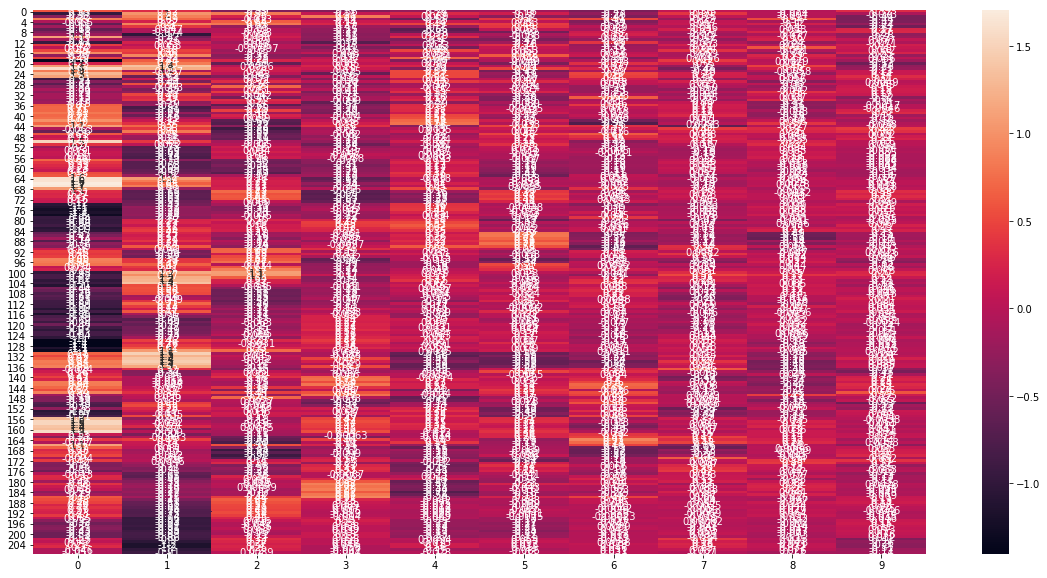

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(x,annot=True)

In [18]:
x.skew()

0    0.177056
1    0.403361
2    0.179856
3    0.437246
4   -0.081498
5    0.260802
6    0.407128
7    0.058413
8   -0.223131
9   -0.266651
dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)
print('shape of X_train :',X_train.shape)
print('shape of X_test :',X_test.shape)
print('shape of y_train :',y_train.shape)
print('shape of y_test :',y_test.shape)

shape of X_train : (166, 10)
shape of X_test : (42, 10)
shape of y_train : (166, 1)
shape of y_test : (42, 1)


In [22]:
#1st we will check the model score using cross validation score for each model

#for Logistic regression

lg = LogisticRegression()

lg.scores = cross_val_score(lg, x, y, cv=5)
print('Model scores :',lg.scores)
print('Model mean score: ',lg.scores.mean())
print('Model std score :', lg.scores.std())

Model scores : [0.45238095 0.9047619  0.57142857 0.87804878 0.41463415]
Model mean score:  0.6442508710801393
Model std score : 0.20850345532927225


In [23]:
#for Decision tree classifier

dt = DecisionTreeClassifier()

dt.scores = cross_val_score(dt, x, y, cv=5)
print('Model scores :',dt.scores)
print('Model mean score: ',dt.scores.mean())
print('Model std score :', dt.scores.std())

Model scores : [0.54761905 0.5        0.4047619  0.68292683 0.29268293]
Model mean score:  0.4855981416957027
Model std score : 0.13171438384768006


In [24]:
#for support vector classifier 'svc'

svc = SVC()

svc.scores = cross_val_score(svc, x, y, cv=5)
print('Model scores :',svc.scores)
print('Model mean score: ',svc.scores.mean())
print('Model std score :', svc.scores.std())

Model scores : [0.52380952 0.5952381  0.42857143 0.70731707 0.31707317]
Model mean score:  0.5144018583042973
Model std score : 0.1342719293866649


In [25]:
# for gaussiannb classifier

gnb = GaussianNB()

gnb.scores = cross_val_score(gnb, x, y, cv=5)
print('Model scores :',gnb.scores)
print('Model mean score: ',gnb.scores.mean())
print('Model std score :', gnb.scores.std())

Model scores : [0.47619048 0.73809524 0.42857143 0.70731707 0.36585366]
Model mean score:  0.543205574912892
Model std score : 0.1509968727373656


In [27]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.scores = cross_val_score(rf, x, y, cv=5)
print('Model scores :',rf.scores)
print('Model mean score: ',rf.scores.mean())
print('Model std score :', rf.scores.std())

Model scores : [0.35714286 0.64285714 0.42857143 0.7804878  0.46341463]
Model mean score:  0.5344947735191637
Model std score : 0.15490695144259936


from above results, it seems that the logistic regression is working well as compared to other models

In [28]:
#creating model with train and test 

lg.fit(X_train,y_train)
lg.score(X_train,y_train)
lg_pred = lg.predict(X_test)
print('Accuracy score of lgmodel :', accuracy_score(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

Accuracy score of lgmodel : 0.7380952380952381
[[13  4]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.82      0.72      0.77        25

    accuracy                           0.74        42
   macro avg       0.73      0.74      0.73        42
weighted avg       0.75      0.74      0.74        42



In [29]:
lg_pred_prob = lg.predict_proba(X_test)
lg_pred_prob

array([[0.4709568 , 0.5290432 ],
       [0.2705229 , 0.7294771 ],
       [0.34785732, 0.65214268],
       [0.58847363, 0.41152637],
       [0.77418253, 0.22581747],
       [0.82126121, 0.17873879],
       [0.15488928, 0.84511072],
       [0.644775  , 0.355225  ],
       [0.97833541, 0.02166459],
       [0.6300092 , 0.3699908 ],
       [0.35007259, 0.64992741],
       [0.28071364, 0.71928636],
       [0.56971535, 0.43028465],
       [0.66670266, 0.33329734],
       [0.68244275, 0.31755725],
       [0.54493254, 0.45506746],
       [0.53838073, 0.46161927],
       [0.08876629, 0.91123371],
       [0.46613043, 0.53386957],
       [0.26922466, 0.73077534],
       [0.2113129 , 0.7886871 ],
       [0.55730053, 0.44269947],
       [0.69428767, 0.30571233],
       [0.29483835, 0.70516165],
       [0.86577174, 0.13422826],
       [0.48023828, 0.51976172],
       [0.25089003, 0.74910997],
       [0.73166162, 0.26833838],
       [0.59279482, 0.40720518],
       [0.38853803, 0.61146197],
       [0.

In [30]:
#AUC ROC curve

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
lg_pred_prob = lg.predict_proba(X_test)[:,1]
lg_pred_prob
#calculating the probability of getting 1

array([0.5290432 , 0.7294771 , 0.65214268, 0.41152637, 0.22581747,
       0.17873879, 0.84511072, 0.355225  , 0.02166459, 0.3699908 ,
       0.64992741, 0.71928636, 0.43028465, 0.33329734, 0.31755725,
       0.45506746, 0.46161927, 0.91123371, 0.53386957, 0.73077534,
       0.7886871 , 0.44269947, 0.30571233, 0.70516165, 0.13422826,
       0.51976172, 0.74910997, 0.26833838, 0.40720518, 0.61146197,
       0.67938694, 0.32877878, 0.54015016, 0.74872628, 0.47434557,
       0.04167465, 0.81755573, 0.74602327, 0.58010462, 0.84568711,
       0.9151252 , 0.36045208])

In [33]:
fpr,tpr,thresholds = roc_curve(y_test,lg_pred_prob)

In [34]:
fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 0.17647059, 0.17647059, 0.23529412,
       0.23529412, 0.29411765, 0.29411765, 0.41176471, 0.41176471,
       0.47058824, 0.47058824, 0.82352941, 0.82352941, 1.        ])

In [35]:
tpr

array([0.  , 0.04, 0.48, 0.48, 0.52, 0.52, 0.6 , 0.6 , 0.72, 0.72, 0.76,
       0.76, 0.8 , 0.8 , 0.92, 0.92, 0.96, 0.96, 1.  , 1.  ])

In [36]:
thresholds

array([1.9151252 , 0.9151252 , 0.71928636, 0.70516165, 0.67938694,
       0.65214268, 0.61146197, 0.58010462, 0.5290432 , 0.51976172,
       0.47434557, 0.46161927, 0.45506746, 0.43028465, 0.3699908 ,
       0.36045208, 0.355225  , 0.22581747, 0.17873879, 0.02166459])

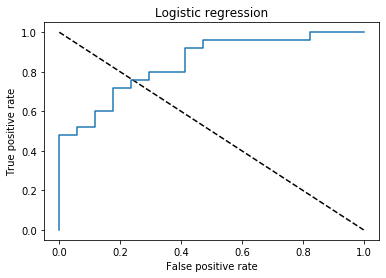

In [37]:
#plotting AUC ROC curve
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression')
plt.show()

In [38]:
auc_score = roc_auc_score(y_test,lg_pred)
auc_score

0.7423529411764705

In [39]:
#saving the model
from sklearn.externals import joblib
joblib.dump(lg_pred,'SONAR.pkl')

['SONAR.pkl']